In [24]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv


In [25]:
# File to Load (Remember to change these)
city_data_to_load = "Pyber_data/city_data.csv"
ride_data_to_load = "Pyber_data/ride_data.csv"

# Read the City and Ride Data
City_data = pd.read_csv(city_data_to_load)
Rain_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged = City_data.merge(Rain_data, on='city')

# Display the data table for preview
merged_data = merged[["city", "date", "fare", "ride_id", "driver_count", "type"]]
merged_data.head()


,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [26]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
city            2375 non-null object
date            2375 non-null object
fare            2375 non-null float64
ride_id         2375 non-null int64
driver_count    2375 non-null int64
type            2375 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


## Bubble Plot of Ride Sharing Data

In [27]:
average_fare = merged_data['fare'].mean()
average_fare

26.75311157894739

In [28]:
rural = merged_data[merged_data['type']== "Rural"]
rural.head()

,city,date,fare,ride_id,driver_count,type
2250,South Jennifer,2018-04-01 09:32:45,21.63,9135979586871,7,Rural
2251,South Jennifer,2018-03-07 19:10:13,48.79,9730627367446,7,Rural
2252,South Jennifer,2018-04-05 14:35:42,32.20,683983658392,7,Rural
2253,South Jennifer,2018-04-02 10:26:50,14.11,3828267773041,7,Rural
2254,South Jennifer,2018-04-10 20:46:11,43.25,623928772332,7,Rural


In [29]:
urban = merged_data[merged_data['type']== "Urban"]
urban.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [30]:
sub = merged_data[merged_data['type']== "Suburban"]
sub.head()

,city,date,fare,ride_id,driver_count,type
1625,Port Shane,2018-04-09 15:34:40,27.66,4022340141966,7,Suburban
1626,Port Shane,2018-04-23 16:05:47,42.26,8341982666719,7,Suburban
1627,Port Shane,2018-03-02 12:06:00,14.95,2803204948363,7,Suburban
1628,Port Shane,2018-03-26 04:33:30,19.03,6010401984537,7,Suburban
1629,Port Shane,2018-03-15 12:09:42,31.58,2552978514662,7,Suburban


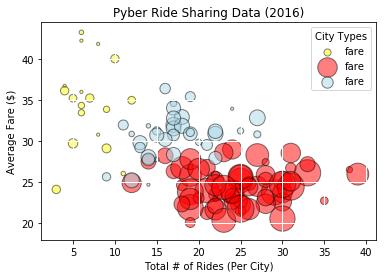

In [31]:
# Obtain the x and y coordinates for each of the three city types
rural = merged_data[merged_data['type']== "Rural"]
urban = merged_data[merged_data['type']== "Urban"]
sub = merged_data[merged_data['type']== "Suburban"]

#x_axis
rural_count = rural.groupby(['city']).count()['ride_id']
urban_count = urban.groupby(['city']).count()['ride_id']
sub_count = sub.groupby(['city']).count()['ride_id']

#y_axis
#fare - avg
rural_fare = rural.groupby(['city']).mean()['fare']
urban_fare = urban.groupby(['city']).mean()['fare']
sub_fare = sub.groupby(['city']).mean()['fare']


#"S==""size
#driver count.mean()
rural_driver_total = rural.groupby(['city']).mean()['driver_count']
urban_driver_total = urban.groupby(['city']).mean()['driver_count']
sub_driver_total = sub.groupby(['city']).mean()['driver_count']

plt.grid(color='w', linestyle='-', linewidth=1)

plt.scatter(rural_count, rural_fare, marker="o", facecolors="yellow", edgecolors="black",
            s=10*rural_driver_total, alpha=0.5)

plt.scatter(urban_count, urban_fare, marker="o", facecolors="red", edgecolors="black",
            s=10*urban_driver_total, alpha=0.5)

plt.scatter(sub_count, sub_fare, marker="o", facecolors="lightblue", edgecolors="black",
            s=10*sub_driver_total, alpha=0.5)

plt.title('Pyber Ride Sharing Data (2016)')
plt.grid(True)
plt.xlabel("Total # of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(loc=1, title="City Types", fontsize=10)


## Total Fares by City Type

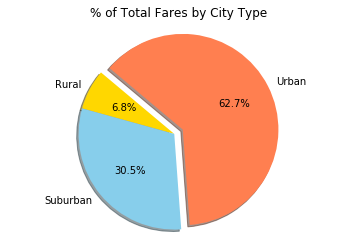

In [32]:
# Calculate Type Percents
type_percent = merged_data.groupby(["type"])
type_fares = type_percent["fare"].sum()
total_fare_rev = type_fares.sum()
fare_percent = type_fares / total_fare_rev * 100
fare_percent

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]

sizes = fare_percent

colors = ["gold", "skyblue", "coral"]

explode = (0, 0, 0.1)

plt.title("% of Total Fares by City Type")
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("../Pyber/fare_percent.png")

plt.show()


## Total Rides by City Type

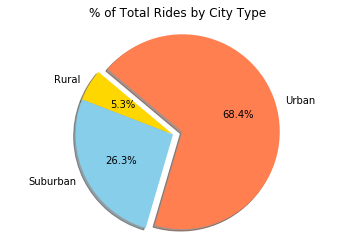

In [33]:
# Calculate Ride Percents
ride_percent = type_percent["ride_id"].count()
rides_sum = ride_percent.sum()
percent_rides = ride_percent / rides_sum * 100
percent_rides

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]

sizes = percent_rides

colors = ["gold", "skyblue", "coral"]

explode = (0, 0, 0.1)

plt.title("% of Total Rides by City Type")
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("../Pyber/ride_percent.png")

plt.show()


## Total Drivers by City Type

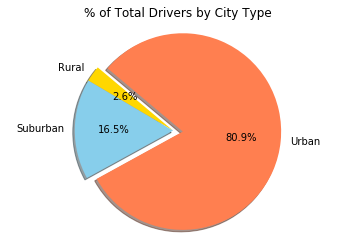

In [34]:
# Calculate Driver Percents
city_type = City_data.groupby(["type"])
drivers_total = city_type["driver_count"].sum()
drivers_sum = drivers_total.sum()
percent_drivers = drivers_total / drivers_sum * 100
percent_drivers

# Build Pie Charts

labels = ["Rural", "Suburban", "Urban"]

sizes = percent_drivers

colors = ["gold", "skyblue", "coral"]

explode = (0, 0, 0.1)

plt.title("% of Total Drivers by City Type")
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("../Pyber/driver_percent.png")

plt.show()
